# Analyze SoHappy output files
This scripts analyse the fits file produced with SoHappy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from astropy.table import Table, vstack
from IPython.display import display

import sys
sys.path.append("../../../../utilities_ths/")  
sys.path.append(".") 
from utilities_ths import MyLabel
from utilities_ths import stamp
import astropy.coordinates as coord
import astropy.units as u
import grb_stat

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

# Get the data
%run prepare_data.py

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\astropy\config\configuration.py:557: ConfigurationMissingWarning: Configuration defaults will be used due to FileExistsError:17 on None
  warn(ConfigurationMissingWarning(msg))


Data where read from file :  ../../output/Prod10_nobug/Pop_1-1000GRB_0dof_100iter.csv
Data counts :  2000


\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_3s  = g_ana[i3s]
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_5s  = g_ana[i5s]


# How far from the prompt ?

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernel

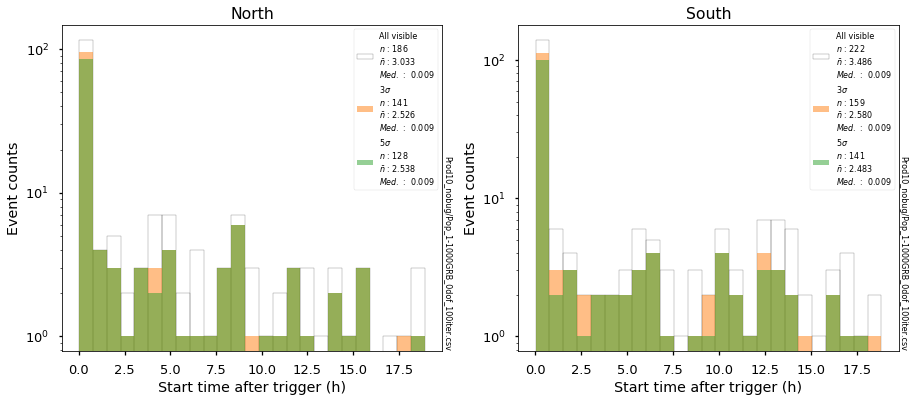

In [2]:
# Time after which the detection is started
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
nbin = 25
for title,site,ax in zip(["North","South"],[north,south],[ax1,ax2]):
    n,bins,_ = ax.hist(g_ana[site].t1/3600,
                        alpha=0.5,
                        bins=nbin,
                        facecolor="none",
                        edgecolor="black",
                        label=MyLabel(g_ana[site].t1/3600,"All visible",stat="med"))
    ax.hist(g_3s[site].t1/3600,
                        bins=bins,
                        alpha=0.5,
                        label=MyLabel(g_3s[site].t1/3600,"$3\sigma$",stat="med"))
    ax.hist(g_5s[site].t1/3600,
                        bins=bins,
                        alpha=0.5,
                        label=MyLabel(g_5s[site].t1/3600,"$5\sigma$",stat="med"))

#     ax.hist(g_vis[site].t1[g_vis[site].t1==0]/3600,
#              bins=bins,
#              facecolor = 'none',
#              edgecolor="red",
#              alpha=1,
#              label=MyLabel(g_vis[site].t1[g_vis[site].t1==0],"Start with trigger"))
    ax.set_xlabel("Start time after trigger (h)")
    ax.set_ylabel("Event counts")
    ax.set_yscale("log")
    ax.set_title(title)
    stamp(ax,file)
    ax.legend(fontsize=8)

plt.show()

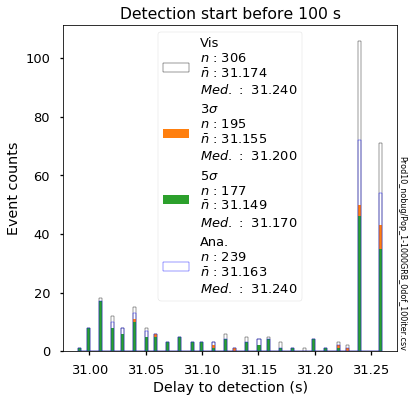

In [5]:
nbin=100
cut=100
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
#n,bins,_ = plt.hist(grb[grb.t1<cut].t1,bins=nbin,label=MyLabel(grb[grb.t1<cut].t1,"All",stat="med"))
n,bins,_ = ax.hist(g_vis[g_vis.t1<cut].t1,bins=nbin,
                    facecolor="none",
                    edgecolor="black",
                    label=MyLabel(g_vis[g_vis.t1<cut].t1,"Vis",stat="med"))
ax.hist(g_3s[g_3s.t1<cut].t1,bins=bins,label=MyLabel(g_3s[g_3s.t1<cut].t1,"$3\sigma$",stat="med"))
ax.hist(g_5s[g_5s.t1<cut].t1,bins=bins,label=MyLabel(g_5s[g_5s.t1<cut].t1,"$5\sigma$",stat="med"))
ax.hist(g_ana[g_ana.t1<cut].t1,bins=bins,
         facecolor="none",
         edgecolor="blue",
         label=MyLabel(g_ana[g_ana.t1<cut].t1,"Ana.",stat="med"))
ax.set_title("Detection start before "+str(cut)+" s")
ax.set_xlabel("Delay to detection (s)")
ax.set_ylabel("Event counts")
stamp(ax,file)
#plt.semilogy()
ax.legend()
plt.show()

# How long to we have ?

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


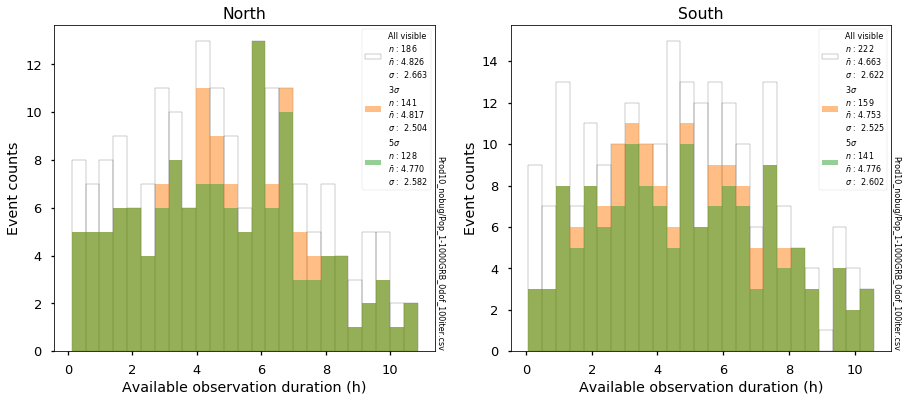

In [6]:
# Avalaible time for observation
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
nbin = 25
for title,site,ax in zip(["North","South"],[north,south],[ax1,ax2]):
    dt = (g_ana[site].t2-g_ana[site].t1)/3600
    n,bins,_ = ax.hist(dt,
                        alpha=0.5,
                        bins=nbin,
                        facecolor="none",
                        edgecolor="black",
                        label=MyLabel(dt,"All visible",stat="std"))
    dt = (g_3s[site].t2-g_3s[site].t1)/3600
    ax.hist(dt,
                        bins=bins,
                        alpha=0.5,
                        label=MyLabel(dt,"$3\sigma$",stat="std"))
    dt = (g_5s[site].t2-g_5s[site].t1)/3600
    ax.hist(dt,
                        bins=bins,
                        alpha=0.5,
                        label=MyLabel(dt,"$5\sigma$",stat="std"))

    ax.set_xlabel("Available observation duration (h)")
    ax.set_ylabel("Event counts")
    #ax.set_yscale("log")
    ax.set_title(title)
    stamp(ax,file)
    ax.legend(fontsize=8)

plt.show()

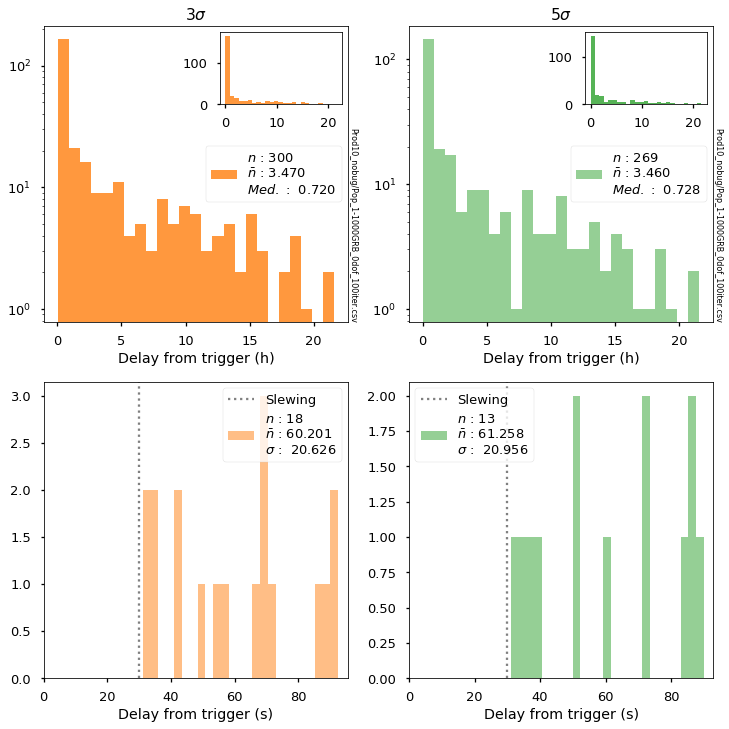

In [7]:
nbin=25
#fig, ((ax1, ax2),(ax11,ax22),(ax3,ax4)) = plt.subplots(nrows=3, ncols=2, figsize=(12,16))
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Long term detection
ax1.hist(g_3s.t3s/3600,bins=nbin,
         alpha=0.8,
         facecolor="tab:orange",
         label=MyLabel(g_3s.t3s/3600,stat="med"))
ax1.set_xlabel("Delay from trigger (h)")
ax1.set_title("$3\sigma$")
ax1.set_yscale("log")
stamp(ax1,file)
ax1.legend(loc="center right")

ax11 = inset_axes(ax1,
                        width="40%", # width = 30% of parent_bbox
                        height=1., # height : 1 inch
                        loc="upper right")
ax11.hist(g_3s.t3s/3600,bins=nbin,facecolor="tab:orange",alpha=0.8)

ax2.hist(g_5s.t5s/3600,bins=nbin,
         alpha=0.5,
         facecolor="tab:green",
         label=MyLabel(g_5s.t5s/3600,stat="med"))
ax2.set_xlabel("Delay from trigger (h)")
ax2.set_title("$5\sigma$")
ax2.set_yscale("log")
stamp(ax2,file)
ax2.legend(loc="center right")
ax22 = inset_axes(ax2,
                        width="40%", # width = 30% of parent_bbox
                        height=1., # height : 1 inch
                        loc="upper right")
ax22.hist(g_5s.t5s/3600,bins=nbin,facecolor="tab:green",alpha=0.8)

# Short term detection
ax3.hist(g_3s.t3s[g_3s.t3s<100],bins=nbin,facecolor="tab:orange",alpha=0.5,label=MyLabel(g_3s.t3s[g_3s.t3s<100]))
ax3.set_xlim(xmin=0)
#ax3.set_title("$3\sigma$")
ax3.axvline(x=30,ls=":",color="grey",label="Slewing")
ax3.set_xlabel("Delay from trigger (s)")
ax3.legend()

ax4.hist(g_5s.t5s[g_5s.t5s<100],bins=nbin,facecolor="tab:green",alpha=0.5,label=MyLabel(g_5s.t5s[g_5s.t5s<100]))
ax4.set_xlim(xmin=0)
#ax4.set_title("$5\sigma$")
ax4.axvline(x=30,ls=":",color="grey",label="Slewing")
ax4.set_xlabel("Delay from trigger (s)")
ax4.legend()

#ax1.set_xscale("log")
plt.show()

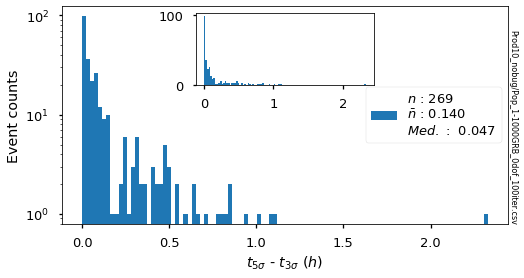

In [29]:
nbin=100
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
ax.hist((g_5s.t5s - g_5s.t3s)/3600,bins=nbin,label=MyLabel((g_5s.t5s - g_5s.t3s)/3600,stat="med"))
ax.legend(loc ="center right")
ax.set_yscale("log")
ax.set_xlabel("$t_{5\sigma}$ - $t_{3\sigma}$ $(h)$")
ax.set_ylabel("Event counts")
stamp(ax,file)
axx = inset_axes(ax,
                        width="40%", # width = 30% of parent_bbox
                        height=1., # height : 1 inch
                        loc="upper center")
axx.hist((g_5s.t5s - g_5s.t3s)/3600,bins=nbin,facecolor="tab:blue",alpha=1.)
plt.show()